# Introduction machine learning

In [42]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

## Daten importieren

Die Daten können mit Pandas eingelesen werden mit dem Befehl `pd.read_csv()`.
In vielen Fällen funktioniert dies nicht direkt. Meistens liegt es dann an einem der folgenden Punkte:
- `FileNotFoundError` --> Entweder der Dateiname ist falsch geschrieben, oder der Pfad stimmt nicht.
- `UnicodeDecodeError` --> Entweder der Dateiname (+Pfad) wurden mit unerlaubten Zeichen geschrieben (bei Windows z.B. muss oft "//" statt "/" verwendet werden), oder die Datei selbst ist nicht im erwarteten "Encoding" gespeichert. Für letzterers gibt es zwei Möglichkeiten: (1) Die Datei mit einem Editor umwandeln. Oder (2) den parameter `encoding=...` entsprechend setzten.  
Es gibt sehr viele mögliche Encodings ([siehe Link](https://docs.python.org/3/library/codecs.html#standard-encodings)), aber am häufigsten sind "utf-8" (der Standard), "ANSI" (auf mac: "iso-8859-1" oder "ISO8859") oder "ASCII".
- `ParserError` --> Bedeutet meistens, dass der "delimiter" also das Trennzeichen falsch angegeben ist. Am besten die Datei kurz mit einem Editor öffnen und nachschauen und dann entsprechend setzten mit `delimiter="..."`. Typische Trennzeichen sind `","`, `";"`, `"\t"` (tab).
- Falls die Datei nicht mit den gewünschten Spaltennamen beginnt, kann dies durch das Angeben der zu überspringenden Zeilen korrigiert werden --> `skiprows=1` (1, 2, 3,... je nach Fall).

In [43]:
filename = "data/penguins_size.csv"

data = pd.read_csv(filename)
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# (1) Erste Datenerkundung
Das sollte inzwischen fast automatisch gehen.

- Gibt es fehlende Werte? --> `.info()`
- erster Überblick & Suche nach problematischen Einträgen --> `.describe()` (oder `.describe(include="all")`)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [45]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Data cleaning
Business as usual...

- Einträge mit fehlenden Werten (`NaN`) entfernen mit `.dropna()`.

In [46]:
data = data.dropna()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


## Data exploration

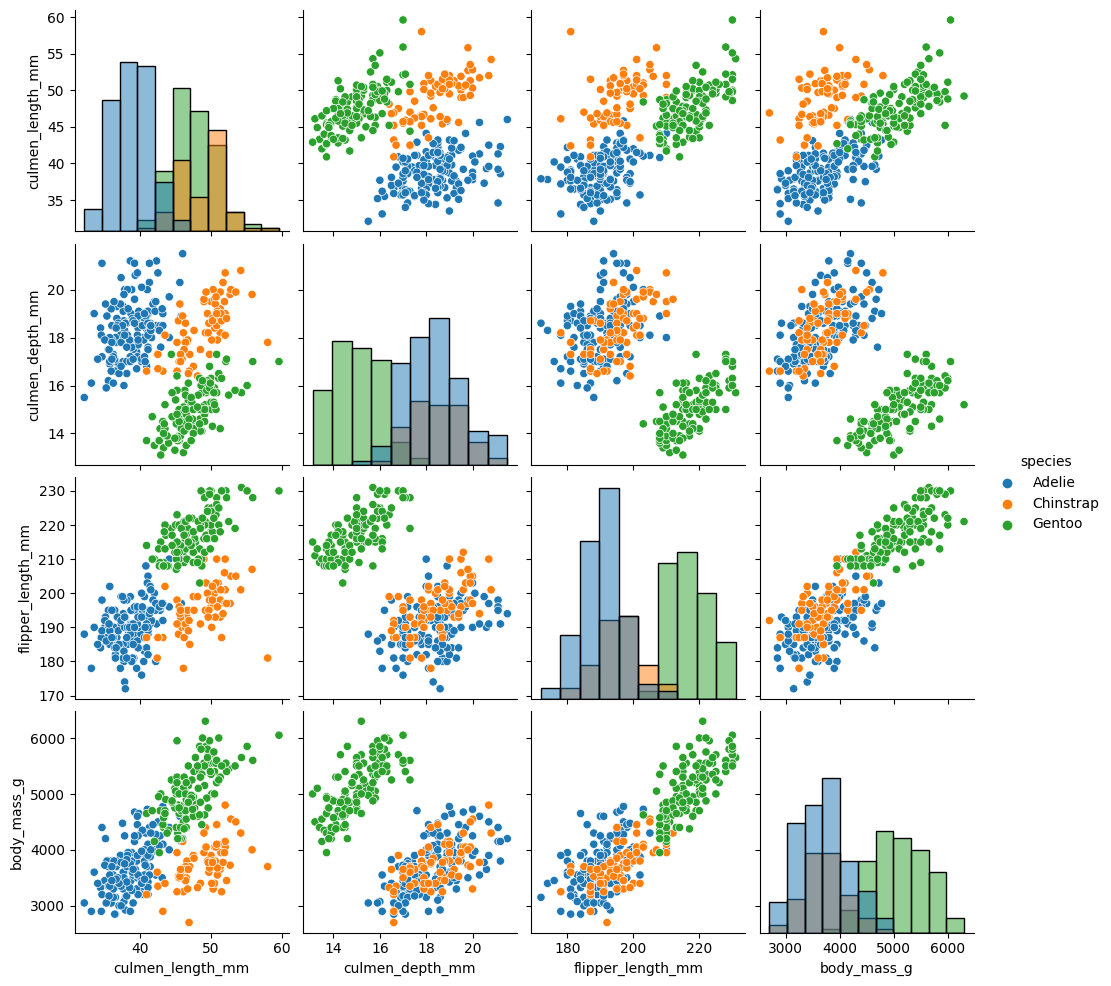

In [48]:
sb.pairplot(data, hue="species", diag_kind="hist")

C:\Users\Phili\AppData\Local\Temp\ipykernel_13060\1462504756.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(),


<AxesSubplot: >

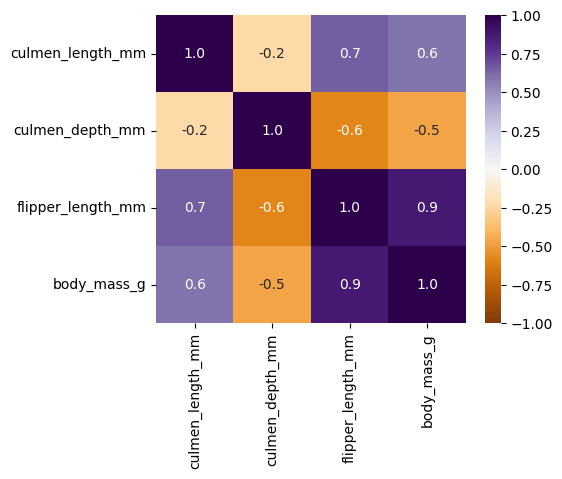

In [49]:
fig, ax = plt.subplots(figsize=(5, 4))

sb.heatmap(data.corr(),
           annot=True, cmap="PuOr",fmt=".1f",
           vmin=-1, vmax=1)

# Teilen in Daten und Label

- Label: "species"
- Daten: Alles ausser "species" und "island" --> `.drop()`

### Aufgaben:
- Aus `data` die Daten `X` und die Labels `y` erstellen.
- Testen welche Werte wir bei "sex" haben? --> `.value_counts()` Eventuell Daten die nicht passen entfernen...
- Geschlecht in Zahlen umwandeln, z.B. mit `pd.get_dummies(data["sex"])`

In [50]:
data.sex.value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [51]:
mask = data["sex"] == "."
data = data[~mask]

In [52]:

#change female to 1 and male to 0
data["sex"] = pd.get_dummies(data.sex, drop_first=True)
data.head()

C:\Users\Phili\AppData\Local\Temp\ipykernel_13060\1682116770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["sex"] = pd.get_dummies(data.sex, drop_first=True)


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1


In [53]:
X=data.drop(['species',"island"],axis=1)
X.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1


In [54]:
y= data["species"]
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [56]:
X.shape,y.shape

((333, 5), (333,))

## Train-Test split
Mit der scikit-learn Funktion `train_test_split` wird ein Datensatz zufällig auf Trainings- und Test-Daten verteilt. Wir können dabei angeben welcher Anteil zu Testdaten wird mit `test_size=...` wobei Werte zwischen 0 (keine Daten) und 1 (alle Daten) eingesetzt werden.
Siehe auch die [Scikit-Learn Dokumentation zu train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

Da es eine zufällige Aufteilung ist, legen wir besser einen "Seed" fest um es reproduzierbar zu machen, und zwar mit `random_state=0` (oder einer anderen Zahl).

### Aufgabe:

- Die Daten mit `train_test_split` so aufteilen, dass 70% der Daten als Trainingsdaten und 30% als Testdaten vorliegen.

In [80]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((233, 5), (100, 5), (233,), (100,))

## Daten skalieren

Für einige Algorithmen ist es sehr wichtig, dass die Daten alle ähnlich skaliert sind. Zum Beispiel auch für k-nearest-neighbors. Dafür verwenden wir wieder den `StandardScaler` von Scikit-Learn ([siehe Scikit-Learn Dokumenation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). 

Am "saubersten" ist es hierbei, wenn die Skalierung **auf Basis der Trainings-daten** durchgeführt wird so dass keine indirekten Informationen von den Test-Daten mit einbezogen werden.

### Aufgaben:
- Den `StandardScaler()` mit Hilfe der Methode `.fit()` auf der Grundlage der Trainingsdaten justieren.
- Die Trainingsdaten und die Testdaten mit Hilfe der Methode `.transform()` in skalierte Daten umwandeln.

In [81]:
from sklearn.preprocessing import StandardScaler

# Scale
scaler = StandardScaler().fit(X_train, y_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns=X.columns)

In [82]:
# How does the scaled data look like?
X_train_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.688594,0.411786,-1.013193,-1.225119,-0.995717
1,0.755144,-0.779126,1.443653,1.104356,1.004301
2,0.605145,-1.296914,0.793311,0.644592,-0.995717
3,-1.232340,-0.054223,-1.157714,-0.734703,-0.995717
4,1.617637,1.499140,0.287490,0.430035,1.004301


# Modell trainieren
Zuerst werden wir ein k-nearest neighbor Modell ausprobieren, wieder mit scikit-learn. Siehe [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier).
Der wichtigste Parameter ist `n_neighbors`, d.h. die Anzahl der Nachbarn (das "k" in k-NN).

### Aufgabe:
- Ein k-nearest neighbor Modell mit den Trainingsdaten trainieren. 

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)  # specify your model parameters
knn.fit(X_train_scaled, y_train)  # train the model using data and labels

KNeighborsClassifier(n_neighbors=3)

## Vorhersagen machen

In [84]:
prediction_species = knn.predict(X_test_scaled)
prediction_species

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 

## Ergebnisse auswerten

Eine gute Möglichkeit um Klassifizierungs-Vorhersagen zu prüfen ist die "confusion matrix". Dafür nehmen wir die entsprechende Funktion aus scikit-learn (`confusion_matrix(true_values, predicted_values)` und übergeben ihr als Parameter die tatsächlichen Label sowie die vorhergesagten Label.

In [90]:
y_test.to_numpy()

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Adelie', 'Gentoo', 

In [92]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,prediction_species)

array([[48,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 34]], dtype=int64)

In [87]:
knn.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### Die Matrix graphisch darstellen:

<AxesSubplot: >

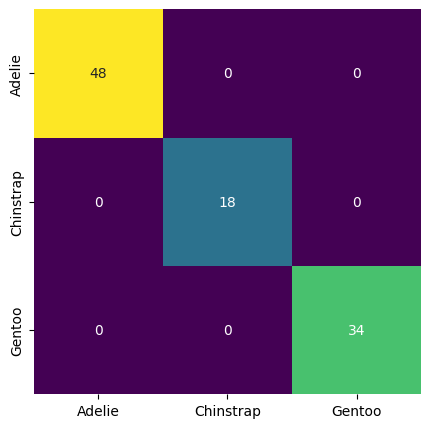

In [88]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test,prediction_species),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=knn.classes_,
           yticklabels=knn.classes_)

# Decision Tree

Entscheidungsbäume sind ein sehr vielseitig einsetzbares Machine Learning Modell. Sie eignen sich für Klassifizierungs- und auch Regressions-Aufgaben, können mit unskalierten (sogar auch kategorischen) Daten umgehen und ihre Vorhersagen lassen sich sehr gut nachvollziehen.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier

# Modell trainieren
Hier jetzt ein Decision Tree Modell, wieder mit scikit-learn. Siehe [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier).
Der wichtigste Parameter ist `max_depth`, d.h. die maximale Tiefe des Baumes.

### Aufgabe:
- Ein decision tree Modell mit den Trainingsdaten trainieren und einer maximalen Tiefe von 2. 

In [122]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2, random_state=0 )
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Ergebnisse auswerten

### Aufgaben:
Ganz genau wie zuvor beim kNN-Modell ist die Aufgabe hier:
- Vorhersagen zu den Test-daten machen
- Vergleichen mit den tatsächlichen Werten über eine confusion matrix.

In [123]:
prediction_species = tree.predict(X_test)
prediction_species

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gento

<AxesSubplot: >

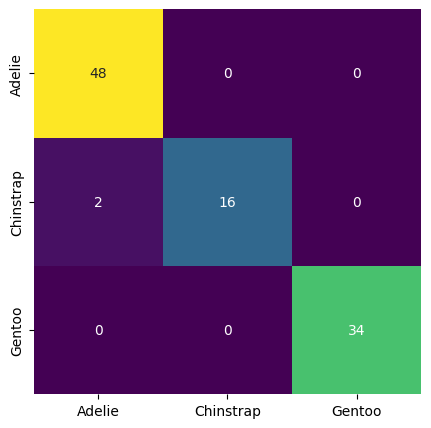

In [124]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test,prediction_species),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=tree.classes_,
           yticklabels=tree.classes_)

## Interessant an Entscheidungsbäumen:
Eine gern genutze Eigenschaft von Eintscheidungsbäumen ist, dass wir uns die Bäume auch ausgeben lassen können!

In [125]:
X_train.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

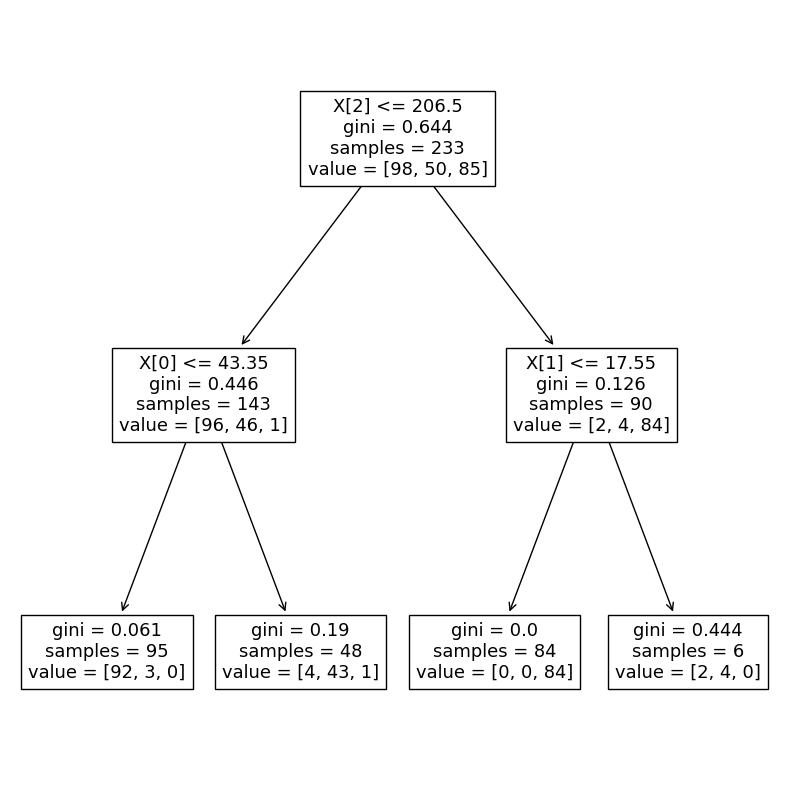

In [126]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(tree)
plt.show()

### Aufgabe:
- das gleiche Spiel nochmal laufen lassen, aber diesmal mit einer Baumtiefe von 5

In [117]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

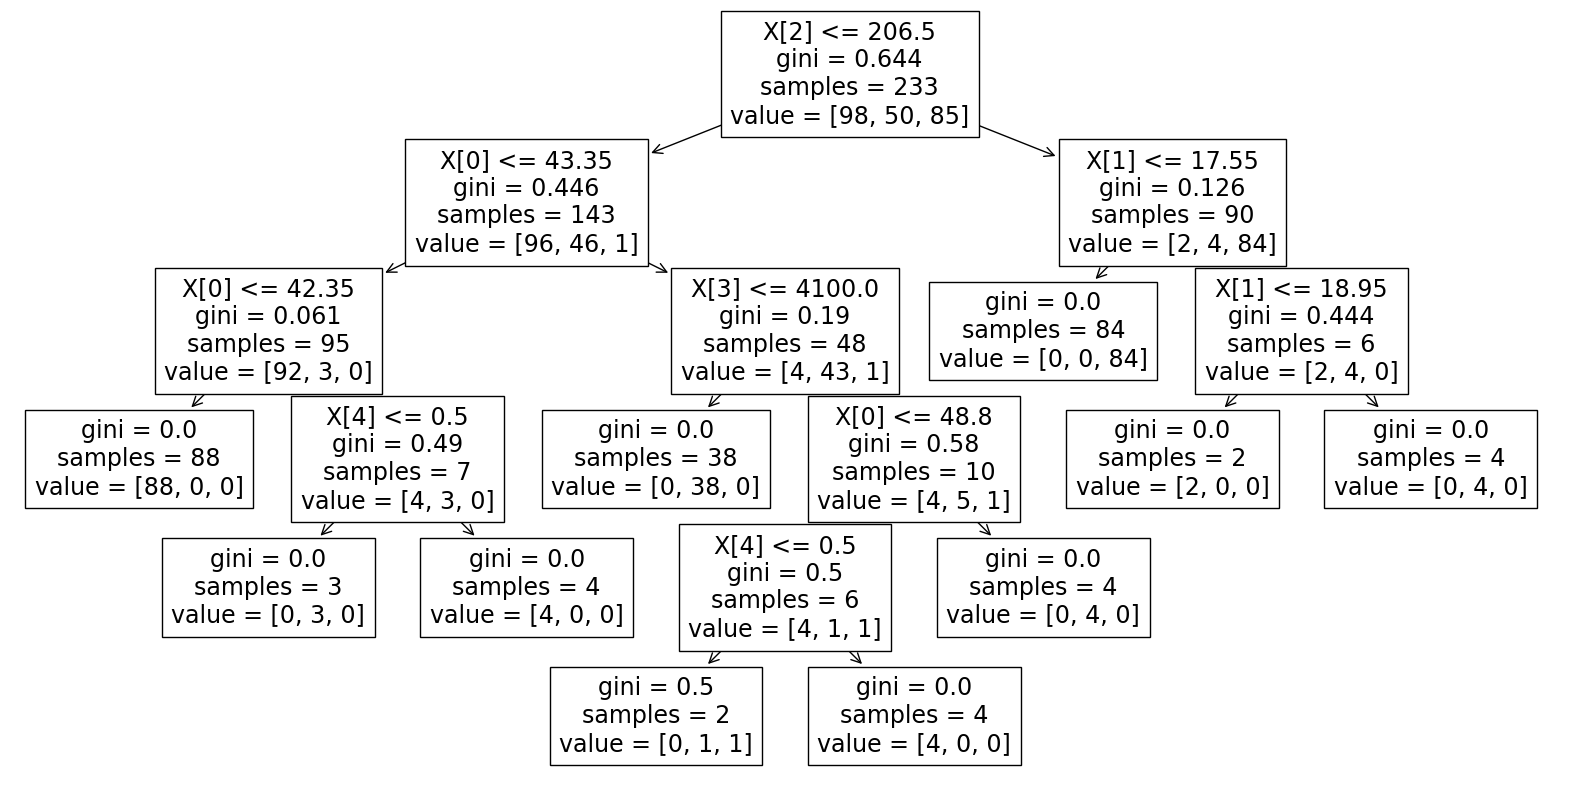

In [118]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree)
plt.show()

# Regression

Anders als bei der Klassifizierung (z.B. von Pinguinen...), geht es bei der Regression um das Vorhersagen von Zahlenwerten.

Hier werden wir beispielhaft eine lineare Regression ausprobieren.

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

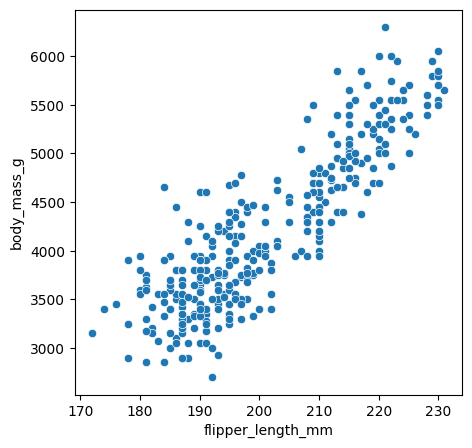

In [127]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.scatterplot(data=data,
               x="flipper_length_mm",
               y="body_mass_g")

## Train-Test split

Hier nehmen wir nur `flipper_length_mm` als Daten, und `body_mass_g` als Label.

In [128]:
from sklearn.model_selection import train_test_split

X_reg = X["flipper_length_mm"].values.reshape(-1, 1)
y_reg = X["body_mass_g"].values

### Aufgaben: 
- Die Daten für die Regression in Training-daten (70%) und Test-daten (30%) aufteilen.
- Anschließend ein `LinearRegression` Modell  mit diesen Daten trainieren.

In [129]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=0)

In [130]:
X_train.shape

(233, 1)

In [131]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(X_train, y_train)

## Ergebnisse auswerten

### Aufgaben:
Ähnlich genau wie zuvor ist die Aufgabe hier:
- Vorhersagen zu den Test-daten machen mit `.predict()`
- Vergleichen mit den tatsächlichen Werten, aber diesmal nicht über eine confusion matrix, sondern indem wie die Abweichung der einzelnen Werte betrachten.

Text(0.5, 1.0, 'Error of predicted body mass (in g)')

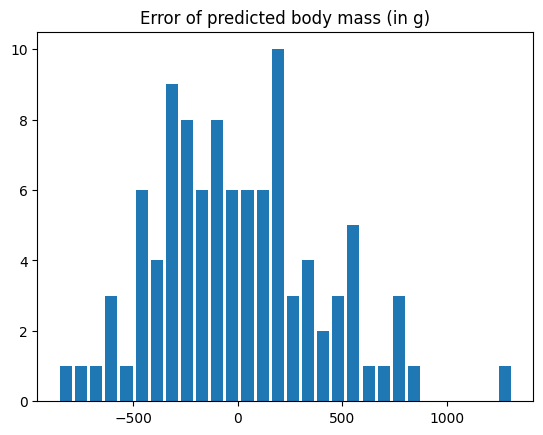

In [132]:
predictions = regression.predict(X_test)

plt.hist(y_test - predictions, bins=30, rwidth=0.8)
plt.title("Error of predicted body mass (in g)")

In [133]:
mse = sum((y_test - predictions) ** 2)
mse = mse / len(y_test)

rmse = mse ** 0.5

print(f"MSE: {mse:.0f} | RMSE: {rmse:.0f}")

MSE: 155816 | RMSE: 395


## Besser mit mehr Featuren?

Wird das Modell besser wenn wir nicht nur ein Feature nehmen, sondern mehrere?

In [134]:
from sklearn.model_selection import train_test_split

X_reg = X.drop("body_mass_g", axis=1).values
y_reg = X["body_mass_g"].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.33, random_state=0)

In [135]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression().fit(X_train, y_train)

Text(0.5, 1.0, 'Error of predicted body mass (in g)')

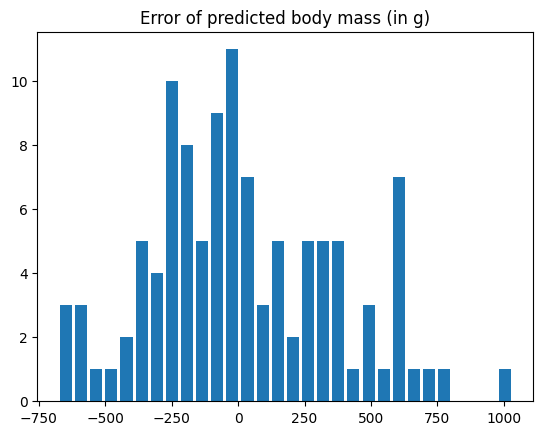

In [138]:
predictions = regression.predict(X_test)
plt.hist(y_test - predictions, bins=30, rwidth=0.8)
plt.title("Error of predicted body mass (in g)")

In [139]:
mse = sum((y_test - predictions) ** 2)
mse = mse / len(y_test)

rmse = mse ** 0.5

print(f"MSE: {mse:.0f} | RMSE: {rmse:.0f}")

MSE: 123522 | RMSE: 351
